In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
# read in file
file = 'NCAP_Program5008_COASTdata_AllSystems_04.2023.csv'
df = pd.read_csv(file)
df.head()

,LATITUDE,LONGITUDE,SEASON,TYPE,COUNTY,SYSTEM,STATION,WIN_Org_ID,WIN_Station _ID,YYYY,...,WIND_DIR,WEATHER_CODE,TP_µg/L,TN_µg/L,CHL_µg/L_uncorrected,CHL_µg/L_corrected,COLOR_PCU,Kd_average,Kd_Z>= 0.5m_average,Notes
0,28.71605,-82.57792,Spring,River,Citrus,Chassahowitzka,1,21FLUFSW,HER-CHA-1,2021,...,SSW,1,19,490,1,0,3.9477,0.651128,0.651128,NaN
1,28.71479,-82.60808,Spring,River,Citrus,Chassahowitzka,2,21FLUFSW,HER-CHA-2,2021,...,SSW,1,25,300,5,4,17.9133,1.287313,1.287313,NaN
2,28.70507,-82.62015,Spring,Estuary,Citrus,Chassahowitzka,3,21FLUFSW,HER-CHA-3,2021,...,SSW,1,19,210,4,2,24.3720,1.221542,1.221542,NaN
3,28.69209,-82.64131,Spring,Estuary,Hernando,Chassahowitzka,4,21FLUFSW,HER-CHA-4,2021,...,SSW,1,15,230,3,1,20.7020,1.049909,1.049909,NaN
4,28.67500,-82.65833,Spring,Estuary,Hernando,Chassahowitzka,5,21FLUFSW,HER-CHA-5,2021,...,SSW,1,16,360,2,1,19.9490,1.088721,1.088721,NaN


In [3]:
# Coordinates data frame to plot stations
coord = df[['LATITUDE', 'LONGITUDE', 'SYSTEM', 'STATION']]
coord_df = coord.groupby(['SYSTEM','STATION']).mean(['LATITUDE', 'LONGITUDE']).reset_index()

In [4]:
# empty group column to be populated with add_grouping function
coord_df['group'] = ''

In [5]:
# allows application of groupIDs to stations
# groups are determined via cluster analysis in PRIMER7
def add_grouping(sys, stations, groupID):
    mask = (coord_df.SYSTEM == sys) & (coord_df.STATION.isin(stations))
    coord_df.loc[mask, 'group'] = groupID

In [6]:
# results from PRIMER7 analysis
# Anclote
add_grouping('Anclote', [1], 'a')
add_grouping('Anclote', [10], 'b')
add_grouping('Anclote', [2], 'c')
add_grouping('Anclote', [9], 'd')
add_grouping('Anclote', [5,6,8], 'e')
add_grouping('Anclote', [3,4,7], 'f')
# Aripeka
add_grouping('Aripeka', [3], 'a')
add_grouping('Aripeka', [5], 'b')
add_grouping('Aripeka', [1,2,4,8,7], 'c')
add_grouping('Aripeka', [6,9,10], 'd')
# Chassahowitzka
add_grouping('Chassahowitzka', [1], 'a')
add_grouping('Chassahowitzka', [2,3,4], 'b')
add_grouping('Chassahowitzka', [9,10], 'c')
add_grouping('Chassahowitzka', [5,8], 'd')
add_grouping('Chassahowitzka', [6,7], 'e')
# Crystal
add_grouping('Crystal', [4], 'a')
add_grouping('Crystal', [3,10,9], 'b')
add_grouping('Crystal', [2,7], 'c')
add_grouping('Crystal', [1,5,6,8], 'd')
# Homosassa
add_grouping('Homosassa', [4,5], 'a')
add_grouping('Homosassa', [7], 'b')
add_grouping('Homosassa', [8], 'c')
add_grouping('Homosassa', [3,9,10], 'd')
add_grouping('Homosassa', [1,2,6], 'e')
# Hudson
add_grouping('Hudson', [5], 'a')
add_grouping('Hudson', [7], 'b')
add_grouping('Hudson', [2,4,9,10], 'c')
add_grouping('Hudson', [1,3,6,8], 'd')
# Pithlachascotee
add_grouping('Pithlachascotee', [1,2], 'a')
add_grouping('Pithlachascotee', [6,7], 'b')
add_grouping('Pithlachascotee', [3,9], 'c')
add_grouping('Pithlachascotee', [4,8], 'd')
add_grouping('Pithlachascotee', [5,10], 'e')
# Weeki Wachee
add_grouping('Weeki Wachee', [1], 'a')
add_grouping('Weeki Wachee', [2,3], 'b')
add_grouping('Weeki Wachee', [4,5], 'c')
add_grouping('Weeki Wachee', [7,8,9], 'd')
add_grouping('Weeki Wachee', [6,10], 'e')
# Withlacoochee
add_grouping('Withlacoochee', [2,3], 'a')
add_grouping('Withlacoochee', [6,9], 'b')
add_grouping('Withlacoochee', [8,10], 'c')
add_grouping('Withlacoochee', [1,5], 'd')
add_grouping('Withlacoochee', [4,7], 'e')

In [7]:
# create GeoDataFrame
gdfCoord = gpd.GeoDataFrame(coord_df, geometry = gpd.points_from_xy(coord_df.LONGITUDE, coord_df.LATITUDE), crs="EPSG:4326")

In [8]:
# OpenStreetMap.Mapnik
# Stamen.TonerLite
# Esri.WorldTopoMap

<Figure size 2000x1500 with 0 Axes>

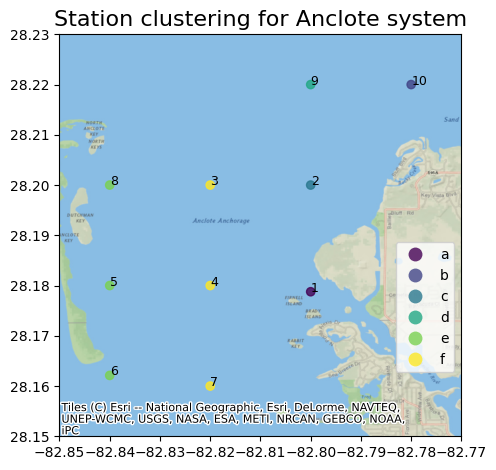

<Figure size 2000x1500 with 0 Axes>

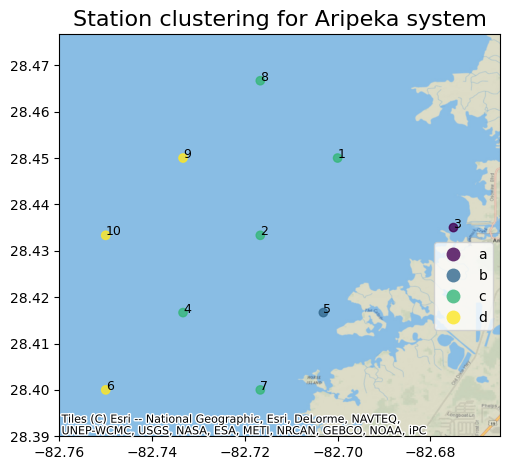

<Figure size 2000x1500 with 0 Axes>

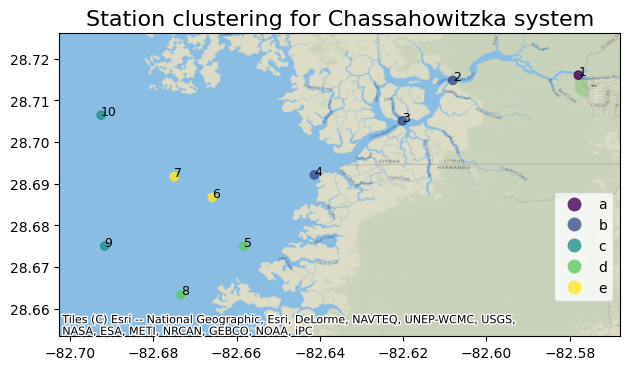

<Figure size 2000x1500 with 0 Axes>

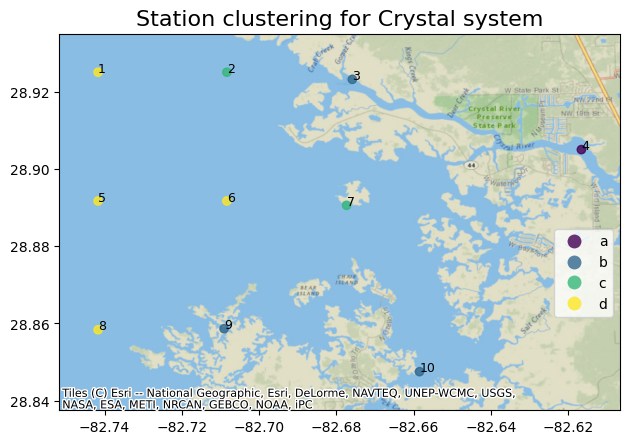

<Figure size 2000x1500 with 0 Axes>

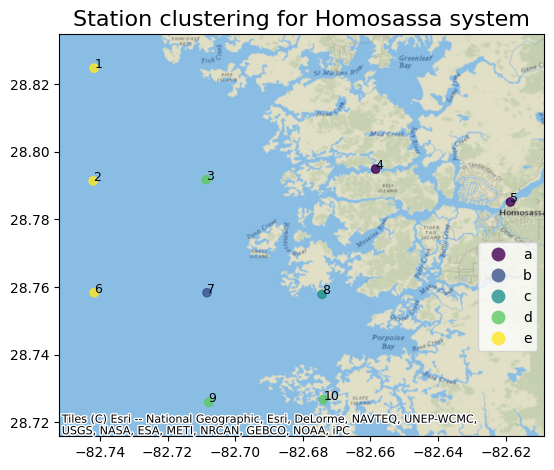

<Figure size 2000x1500 with 0 Axes>

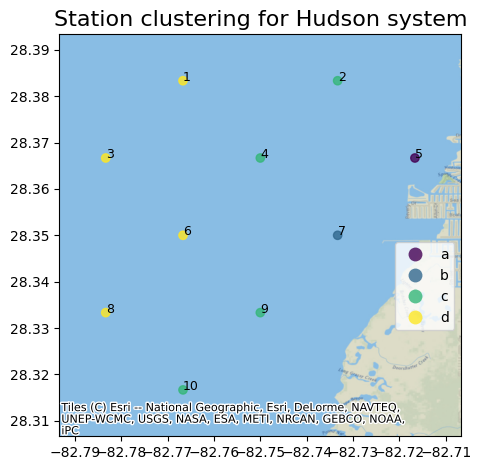

<Figure size 2000x1500 with 0 Axes>

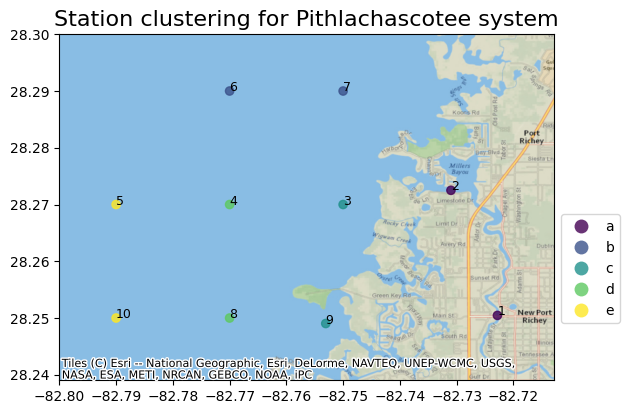

<Figure size 2000x1500 with 0 Axes>

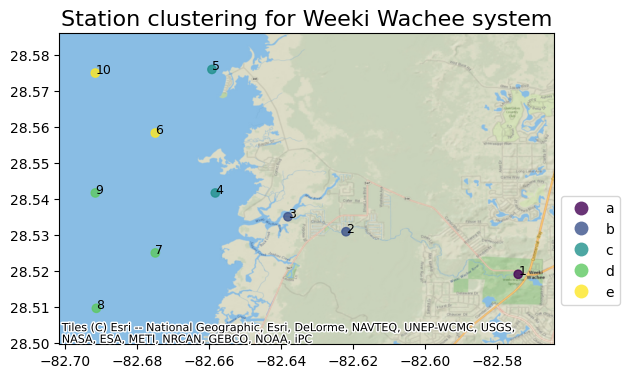

<Figure size 2000x1500 with 0 Axes>

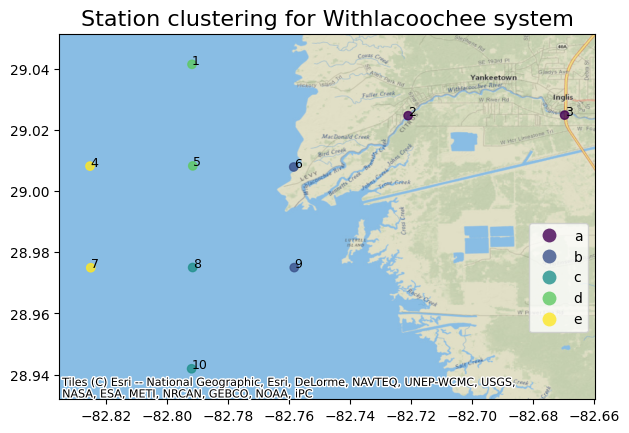

In [12]:
# generate maps for each system
# showing clusterings
systems = coord_df.SYSTEM.unique()
for sys in systems:
    gdfCoordSys = gdfCoord[gdfCoord.SYSTEM==sys]
    
    fig = plt.figure(figsize=(20,15))

    areaPoint = gdfCoordSys
    ax = areaPoint.plot(column='group', k=5,legend='True', cmap='viridis', marker='o', facecolors=areaPoint.group, alpha=0.8)
    ax.set_title(f'Station clustering for {sys} system',size=16)
    
    # Add station labels
    for x, y, label in zip(areaPoint.geometry.x, areaPoint.geometry.y, areaPoint.STATION):
        ax.text(x, y, str(label), fontsize=9, ha='left')
    
    # Legend
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1, 0.5))

    buffer = 0.01  # adjust this value as needed
    ax.set_xlim(areaPoint.total_bounds[0] - buffer, areaPoint.total_bounds[2] + buffer)
    ax.set_ylim(areaPoint.total_bounds[1] - buffer, areaPoint.total_bounds[3] + buffer)
    
    cx.add_basemap(ax, source=cx.providers.Esri.NatGeoWorldMap,crs=areaPoint.crs)
    
    plt.tight_layout()
    plt.savefig(f'output/maps/{sys}.png', dpi=100, bbox_inches='tight')
    plt.show()